Import torch took 5.5958982557058334e-05


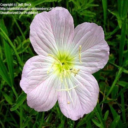

In [8]:
import time
t0 = time.perf_counter()
import torch
print("Import torch took", time.perf_counter() - t0)
import torchvision
from PIL import Image

# Create a vector of zeros of size 5
size = (128, 128)
transform = torchvision.transforms.Compose([torchvision.transforms.Resize(size), torchvision.transforms.ToTensor()])
train_dataset = list(torchvision.datasets.Flowers102("/tmp/flowers", "train", transform=transform, download=True))
test_dataset = list(torchvision.datasets.Flowers102("/tmp/flowers", "test", transform=transform, download=True))



def visualize_image(img: torch.Tensor) -> Image.Image:
    return Image.fromarray((img.permute(1, 2, 0) * 255).to(torch.uint8).numpy())


visualize_image(train_dataset[1][0])

0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1


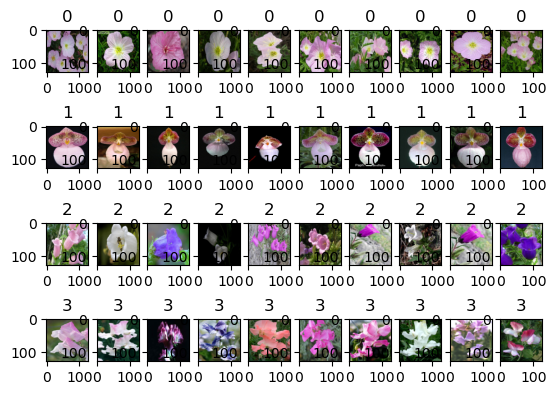

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(4, 10)
for i, (im, lbl) in enumerate(list(train_dataset)[:40]):
    ax[i // 10, i % 10].imshow(visualize_image(im))
    ax[i // 10, i % 10].set_title(lbl)

class_01 = list(train_dataset)[:20]


## Nearest Neighbor Classifier

$f: \mathbb{R} \to \{0, 1\}$

- Input $x$
- Find *closest* data point $(\tilde x, lbl) \in \mathcal{D}$ in dataset $\mathcal{D}$
- Return its label $lbl$

In [16]:
print(test_dataset[1][0])

tensor([[[0.0392, 0.0627, 0.1333,  ..., 0.1098, 0.0980, 0.0902],
         [0.0353, 0.0667, 0.1373,  ..., 0.0745, 0.0980, 0.1020],
         [0.0510, 0.0706, 0.1255,  ..., 0.0510, 0.0510, 0.0784],
         ...,
         [0.3686, 0.4353, 0.4549,  ..., 0.0588, 0.0510, 0.0471],
         [0.3725, 0.4431, 0.4353,  ..., 0.0510, 0.0471, 0.0431],
         [0.3843, 0.4510, 0.4118,  ..., 0.0510, 0.0510, 0.0510]],

        [[0.2118, 0.2510, 0.3451,  ..., 0.2627, 0.2706, 0.2784],
         [0.1686, 0.2353, 0.3451,  ..., 0.2431, 0.2745, 0.2824],
         [0.1255, 0.2078, 0.3333,  ..., 0.2118, 0.2196, 0.2549],
         ...,
         [0.5804, 0.6196, 0.6471,  ..., 0.0627, 0.0549, 0.0471],
         [0.5843, 0.6275, 0.6275,  ..., 0.0549, 0.0471, 0.0431],
         [0.5961, 0.6353, 0.6039,  ..., 0.0510, 0.0510, 0.0510]],

        [[0.0471, 0.0863, 0.1804,  ..., 0.0902, 0.0980, 0.1020],
         [0.0392, 0.0902, 0.1843,  ..., 0.0510, 0.0902, 0.1020],
         [0.0431, 0.0902, 0.1765,  ..., 0.0275, 0.0353, 0.

In [15]:
def nn_classifier(x):
    dist = [((x - im).pow(2).sum(), lbl) for im, lbl in class_01]
    return min(dist)[1]


nn_classifier(test_dataset[1][0])
accuracy = sum(nn_classifier(x) == lbl for x, lbl in list(test_dataset)[:20]) / 20
print(accuracy)

0.4


In [ ]:
[lbl for _,lbl in list(test_dataset)[:20]]

[tensor([[[0.0157, 0.1961, 0.1608,  ..., 0.2157, 0.2275, 0.2314],
          [0.0235, 0.1373, 0.1686,  ..., 0.2392, 0.2431, 0.2431],
          [0.0314, 0.0706, 0.2039,  ..., 0.2627, 0.2627, 0.2588],
          ...,
          [0.0039, 0.0000, 0.0039,  ..., 0.0706, 0.0510, 0.0275],
          [0.0039, 0.0000, 0.0039,  ..., 0.0549, 0.0431, 0.0314],
          [0.0078, 0.0078, 0.0078,  ..., 0.0510, 0.0471, 0.0353]],
 
         [[0.1882, 0.2706, 0.2392,  ..., 0.2471, 0.2549, 0.2588],
          [0.1843, 0.2235, 0.2549,  ..., 0.2667, 0.2627, 0.2627],
          [0.1843, 0.1804, 0.2902,  ..., 0.2784, 0.2745, 0.2706],
          ...,
          [0.0706, 0.0627, 0.0549,  ..., 0.2078, 0.1765, 0.1529],
          [0.0706, 0.0627, 0.0549,  ..., 0.1765, 0.1529, 0.1412],
          [0.0706, 0.0588, 0.0510,  ..., 0.1647, 0.1451, 0.1294]],
 
         [[0.0980, 0.2510, 0.1882,  ..., 0.2157, 0.2235, 0.2275],
          [0.1059, 0.2039, 0.2000,  ..., 0.2314, 0.2275, 0.2275],
          [0.0824, 0.1412, 0.2471,  ...,

## K Nearest Neighbor Classifier

$f: \mathbb{R} \to \{0, 1\}$

- Input $x$
- Find k *closest* data points in dataset $\mathcal{D}$
- Return most common label

In [ ]:
def knn_classifier(x, k=3):
    dist = [((x - im).pow(2).sum(), lbl) for im, lbl in class_01]
    print(dist)
    k_closest = [lbl for _, lbl in sorted(dist)[:k]]
    print(k_closest)
    return sorted(k_closest)[k // 2]


knn_classifier(test_dataset[0][0])

accuracy = sum(knn_classifier(x) == lbl for x, lbl in list(test_dataset)[:20]) / 20
#print(accuracy)

[(tensor(6965.0908), 0), (tensor(3406.0596), 0), (tensor(3553.3462), 0), (tensor(3628.0200), 0), (tensor(3343.6299), 0), (tensor(5952.5093), 0), (tensor(5575.6123), 0), (tensor(8238.6396), 0), (tensor(5813.4458), 0), (tensor(5062.0410), 0), (tensor(4566.1260), 1), (tensor(4190.1934), 1), (tensor(5511.5845), 1), (tensor(6091.8398), 1), (tensor(6359.1475), 1), (tensor(2830.1675), 1), (tensor(5346.7168), 1), (tensor(3308.7249), 1), (tensor(3798.1187), 1), (tensor(3712.2104), 1)]
[1, 1, 0]


1

## K Nearest Neighbor Regression

$f: \mathbb{R} \to \mathbb{R}$

- Input $x$
- Find k *closest* data points in dataset $\mathcal{D}$
- Return average value

In [35]:
def knn_regression(x, k=3):
    dist = [((x - im).pow(2).sum(), lbl) for im, lbl in class_01]
    k_closest = [lbl for _, lbl in sorted(dist)[:k]]
    return torch.mean(torch.tensor(k_closest).float())


knn_regression(test_dataset[3][0])

tensor(0.6667)